In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ibm_data.csv')
df.head(3)

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts
0,0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100
1,1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019,2019-06-04 05:07:11.014300
2,2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019,2019-06-04 05:08:46.081900


In [3]:
df.shape

(1048573, 19)

In [4]:
df.isnull().sum()

Unnamed: 0                          0
ctry_name                           0
intgrtd_mngmt_name                  0
intgrtd_operating_team_name         0
city                            46586
st                              45445
sec_lvl_domn                   319457
device_type                    842041
operating_sys                    1820
ip_addr                             0
user_agent                          6
VISIT                               0
ENGD_VISIT                          0
VIEWS                               0
page_url                            1
wk                                  0
mth                                 0
yr                                  0
page_vw_ts                       2743
dtype: int64

## Understanding the features

#### 1. **User agent** - 
The User-Agent request header is a characteristic string that lets servers and network peers identify the application, operating system, vendor, and/or version of the requesting user agent.
    
   **Syntax -** 
    
    User-Agent: <product> / <product-version> <comment>
    
   **Common format for browsers -**
   
    User-Agent: Mozilla/5.0 (<system-information>) <platform> (<platform-details>) <extensions>
    
   **Directives -** 
    
    <product> - A product identifier — its name or development codename.
    <product-version> - Version number of the product.
    <comment> - Zero or more comments containing more details; sub-product information
    
[Source](https://developer.mozilla.org/en-US/docs/Web/HTTP/Headers/User-Agent)

In [5]:
df.loc[0, 'user_agent']

'MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE MAC OS X) APPLEWEBKIT/605.1.15 (KHTML  LIKE GECKO) VERSION/12.0 MOBILE/15E148 SAFARI/604.1'

##### Replace missing `user_agent` with `unknown_user_agent`

In [6]:
df['user_agent'].fillna('unknown_user_agent', inplace=True)

In [7]:
df['user_agent'].isnull().sum()

0

##### Dropping missing `page_vw_ts`

In [8]:
df['page_vw_ts'].dropna(inplace=True)

In [9]:
df['page_vw_ts'].isnull().sum()

0

In [10]:
df.shape

(1048573, 19)

In [11]:
df.dtypes

Unnamed: 0                      int64
ctry_name                      object
intgrtd_mngmt_name             object
intgrtd_operating_team_name    object
city                           object
st                             object
sec_lvl_domn                   object
device_type                    object
operating_sys                  object
ip_addr                        object
user_agent                     object
VISIT                           int64
ENGD_VISIT                      int64
VIEWS                           int64
page_url                       object
wk                              int64
mth                             int64
yr                              int64
page_vw_ts                     object
dtype: object

In [12]:
df.sample(3)

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts
683622,683622,Spain,SPGI,Europe,LA PENA,BIZKAIA,IBERDROLA.ES,NaN,MICROSOFT_WINDOWS10,8a5ffe72a67617842d23603a7ebfc741d9e285bf7a4235...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64; RV:6...,1,0,1,www.ibm.com/developerworks/community/blogs/897...,11,3,2019,2019-06-04 14:47:27.010800
111988,111988,India,India-South Asia,Asia Pacific,PRAKASH NAGAR,TELANGANA,NaN,MOBILEPHONE,ANDROID_8.1.0,ad9df1c5ee2c7b97b609c9a8b7f4a15301d330e1623b80...,MOZILLA/5.0 (LINUX; ANDROID 8.1.0; VIVO 1806 B...,1,1,1,careers.ibm.com/showjob/id/544304/software%20e...,11,3,2019,2019-06-04 14:24:55.027000
909267,909267,United States,United States,North America,NASHVILLE,TENNESSEE,SBCGLOBAL.NET,NaN,MICROSOFT_WINDOWS10,8ce939fb3fa65c1b693fc407face16d1e4ebc45753e7db...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,0,1,www.ibm.com/support/knowledgecenter/en/ssgu8g_...,11,3,2019,2019-06-04 19:18:53.094800


##### `device_type`, `sec_lvl_domn`  have too many nulls and also it won't be useful so dropping that column

In [13]:
df.drop(['device_type', 'sec_lvl_domn'], axis=1, inplace=True)

In [14]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
data = df.copy()

In [16]:
data['date'] = pd.to_datetime(data['page_vw_ts'])
del data['page_vw_ts']

In [17]:
data.head(3)

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,date
0,United States,United States,North America,SLIDELL,LOUISIANA,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100
1,Japan,Japan,Japan,TOKYO,TOKYO,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019,2019-06-04 05:07:11.014300
2,United States,United States,North America,ELK GROVE,CALIFORNIA,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019,2019-06-04 05:08:46.081900


In [18]:
data.nunique()

ctry_name                          220
intgrtd_mngmt_name                  21
intgrtd_operating_team_name          8
city                             20642
st                                1856
operating_sys                      174
ip_addr                         450602
user_agent                       39714
VISIT                              129
ENGD_VISIT                          73
VIEWS                              183
page_url                        329691
wk                                   1
mth                                  1
yr                                   1
date                           1038808
dtype: int64

In [19]:
data.set_index(['date'], inplace=True)

In [20]:
data.head(3)

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr
date,,,,,,,,,,,,,,,
2019-06-04 05:05:18.023100,United States,United States,North America,SLIDELL,LOUISIANA,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019
2019-06-04 05:07:11.014300,Japan,Japan,Japan,TOKYO,TOKYO,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019
2019-06-04 05:08:46.081900,United States,United States,North America,ELK GROVE,CALIFORNIA,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019


In [21]:
data.index.year.unique()

Float64Index([2019.0, nan, 2018.0, 2014.0, 2011.0, 2013.0, 2016.0, 2012.0,
              2020.0, 2001.0],
             dtype='float64', name='date')

In [22]:
data.index.year.value_counts(dropna=False)

2019.0    1045785
NaN          2743
2018.0         23
2011.0          9
2016.0          4
2012.0          4
2020.0          2
2014.0          1
2013.0          1
2001.0          1
Name: date, dtype: int64

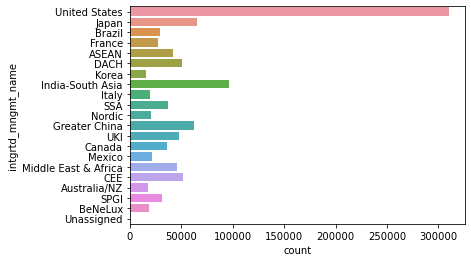

In [23]:
# plt.figure(figsize=(15,8))
sns.countplot(y=data['intgrtd_mngmt_name'])

### Pivot & Pivot table example

In [44]:
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item0', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1',  '2',  '3',  '4']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))
d = pd.DataFrame(table)
d

,Item,CType,USD,EU
0,Item0,Gold,1,1€
1,Item0,Bronze,2,2€
2,Item0,Gold,3,3€
3,Item1,Silver,4,4€


In [29]:
p = d.pivot(index='Item', columns='CType', values='USD')

ValueError: Index contains duplicate entries, cannot reshape

##### We cannot use pivot here as the column `CType` has `Gold` more than once so the function will get confused and will not understand which value of `USD` to put ie `1` or `3`. So we get the error that `ValueError: Index contains duplicate entries, cannot reshape`.
##### So in such as case where we have duplicate values in a column which is used  as a `columns` parameter in `pivot` the we should use `pivot_table` as it allows us to perform aggregation on that duplicate value

In [41]:
d['USD'] = d['USD'].astype('int')
# d['USD'] = d['USD'].astype('int')

In [43]:
d.pivot_table(index='CType', columns='Item', values='USD', aggfunc='sum')

Item,Item0,Item1
CType,,
Bronze,2.0,NaN
Gold,4.0,NaN
Silver,NaN,4.0


#### Visualise number of visits for top 20 countries

In [70]:
country_vists = data.groupby(['ctry_name'])['VISIT'].sum()

In [76]:
country_vists = country_vists.reset_index()

In [77]:
country_vists

,ctry_name,VISIT
0,Afghanistan,84
1,Aland Islands,45
2,Albania,344
3,Algeria,779
4,American Samoa,4
...,...,...
215,"Virgin Islands, British",7
216,"Virgin Islands, U.S.",12
217,Yemen,87
218,Zambia,95


In [79]:
country_vists.sort_values('VISIT', ascending=False, inplace=True)

In [83]:
country_vists.dtypes

ctry_name    object
VISIT         int64
dtype: object

Text(0.5, 1.0, 'Countrywise Visit ')

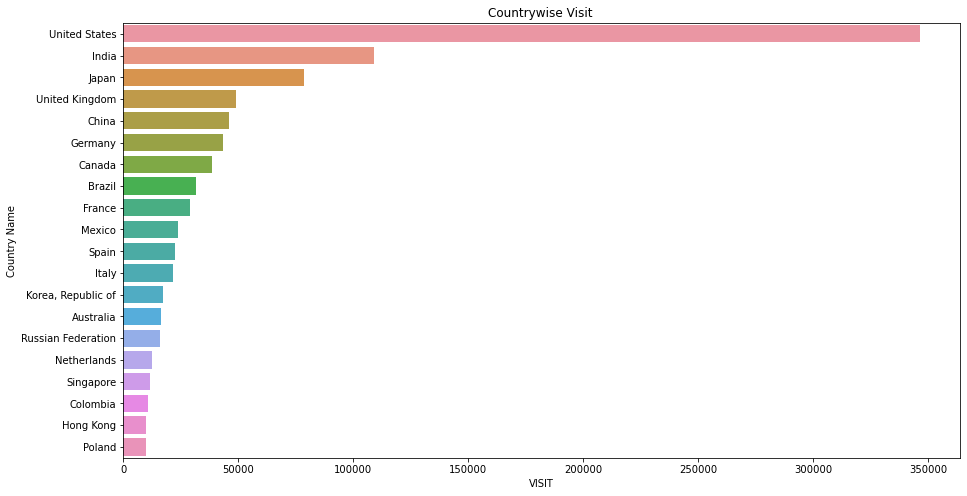

In [99]:
plt.figure(figsize=(15, 8))
sns.barplot(y=country_vists['ctry_name'].head(20), x=country_vists['VISIT'].head(20))
plt.ylabel('Country Name')
plt.title('Countrywise Visit ')

#### Same plot as above using `dataframe.plot.bar()`

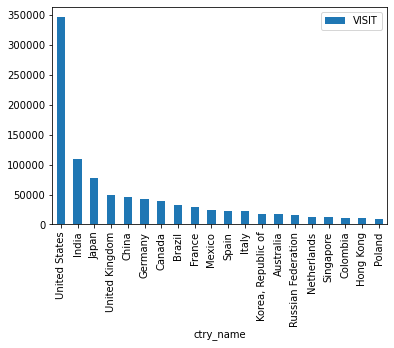

In [95]:
country_vists.head(20).plot.bar(x='ctry_name', y='VISIT')

In [100]:
country_vists = data.pivot_table(index='ctry_name', columns='VISIT', aggfunc='sum')

country_vists

ENGD_VISIT                                           \
VISIT                         1     2    3    4    5    6    7    8    9      
ctry_name                                                                     
Afghanistan                   24.0   2.0  3.0  NaN  NaN  NaN  NaN  NaN  NaN   
Aland Islands                 16.0   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Albania                       93.0  12.0  2.0  4.0  NaN  NaN  NaN  NaN  NaN   
Algeria                      195.0  18.0  0.0  0.0  NaN  1.0  NaN  NaN  NaN   
American Samoa                 0.0   NaN  0.0  NaN  NaN  NaN  NaN  NaN  NaN   
...                            ...   ...  ...  ...  ...  ...  ...  ...  ...   
Virgin Islands, British        2.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Virgin Islands, U.S.           0.0   NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN   
Yemen                         28.0   6.0  NaN  0.0  NaN  NaN  NaN  NaN  NaN   
Zambia                        33.0   4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Zimbabwe                      40.0   1.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN   

                              ...   yr                                     \
VISIT                   10    ... 288  293  355  360  372  463  476  517    
ctry_name                     ...                                           
Afghanistan              NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Aland Islands            NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Albania                  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Algeria                  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
American Samoa           NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Virgin Islands, British  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Virgin Islands, U.S.     NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Yemen                    NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Zambia                   NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Zimbabwe                 NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                                   
VISIT                   788  1195  
ctry_name                          
Afghanistan              NaN  NaN  
Aland Islands            NaN  NaN  
Albania                  NaN  NaN  
Algeria                  NaN  NaN  
American Samoa           NaN  NaN  
...                      ...  ...  
Virgin Islands, British  NaN  NaN  
Virgin Islands, U.S.     NaN  NaN  
Yemen                    NaN  NaN  
Zambia                   NaN  NaN  
Zimbabwe                 NaN  NaN  

[220 rows x 645 columns]

In [ ]:
data.ip_addr

In [ ]:
a = data.pivot_table(index='ctry_name', columns='ip_addr')
